# Video example

Simple example of subsampled dynamic-foreground/static-background video seperation.


In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import cv2

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *

In [2]:
frames = []

path = "../data/dataset_shop.avi"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

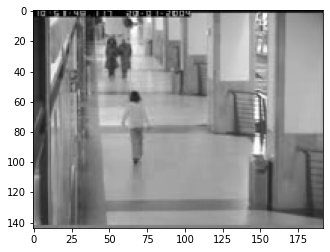

In [3]:
plt.imshow(cv2.cvtColor(video[50,:,:,:], cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
T = video.shape[0]
H = video.shape[1]
W = video.shape[2]
C = video.shape[3]


rho_r = 0.01
rho_s = 0.1
delta = 0.5

m = T
n = H*W
p = round(delta*m*n)
s = round(rho_s*p)
alpha = s/(m*n)
r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))
print(str(r) +','+ str(s))

HTr = FixedRank(r, (m,n))
HTs = Sparsity(s)

# Prepare transform
A = FastJLT((p, H * W * T))

video_mat = video.reshape((T, -1, C))
bs = []
for band in range(C):
    bs.append(A.matvec(video_mat[:,:,band].flatten()))

1,217037


In [5]:
solver = NAHT(logverbosity = 2, maxiter = 20, verbosity = 2)
problem = LinearProblemSum(A, bs[0], (HTr, HTs))

In [6]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
    1	+7.1636318431928456e+07	1.68282160e+04
    2	+4.3856621488189228e+07	1.09627860e+04
    3	+3.0050070677465368e+07	8.72198649e+03
    4	+2.4510422696159486e+07	7.35306026e+03
    5	+2.1845041660788193e+07	6.74604100e+03
    6	+2.0251219461413633e+07	6.42787833e+03
    7	+1.9281739517734218e+07	6.24073000e+03
    8	+1.8604055566566274e+07	6.12148942e+03
    9	+1.8130653835020225e+07	6.03558635e+03
   10	+1.7775710375076134e+07	5.97406106e+03
   11	+1.7509457542201895e+07	5.92656739e+03
   12	+1.7304494515392236e+07	5.89021177e+03
   13	+1.7148269102611881e+07	5.86178075e+03
   14	+1.7020289087435551e+07	5.83973628e+03
   15	+1.6916088748426117e+07	5.82113041e+03
   16	+1.6829769840352159e+07	5.80583219e+03
   17	+1.6757223153187357e+07	5.79299654e+03
   18	+1.6689412690000052e+07	5.78186218e+03
   19	+1.6631808533817278e+07	5.77104643e+03
   20	+1.6580908878402976e+07	5.76217436e+03
Terminated - max iterations reached after 136.74 seconds.



In [7]:
opt_log['iterations'].keys()

dict_keys(['iteration', 'time', 'fx', 'xdist'])

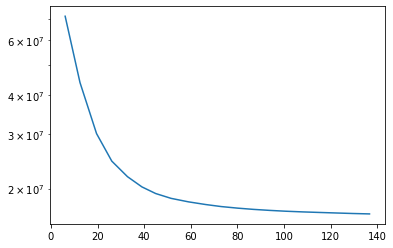

In [8]:
plt.semilogy(opt_log['iterations']['time'], opt_log['iterations']['fx'])

In [9]:
L = x[0].reshape(T, H, W, 1)
S = x[1].reshape(T, H, W, 1)

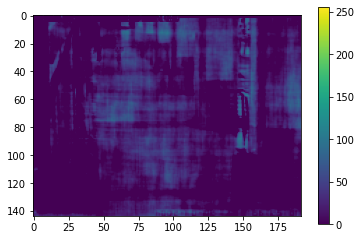

In [10]:
plt.imshow(L[50,:,:,:], vmin = 0, vmax = 256)
plt.colorbar()

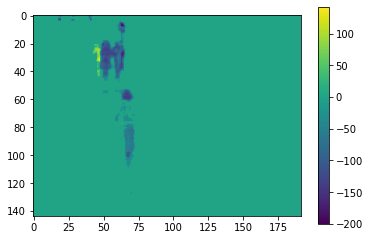

In [11]:
plt.imshow(S[50,:,:,:])
plt.colorbar()